### Optimisation of a Chemical Transformation with Bayesian Optimisation

#### Hackathon Breif

This hackathon involves the optimisation of reaction conditions for a Buchwald-Hartwig reaction with Bayesian Optimisation. 

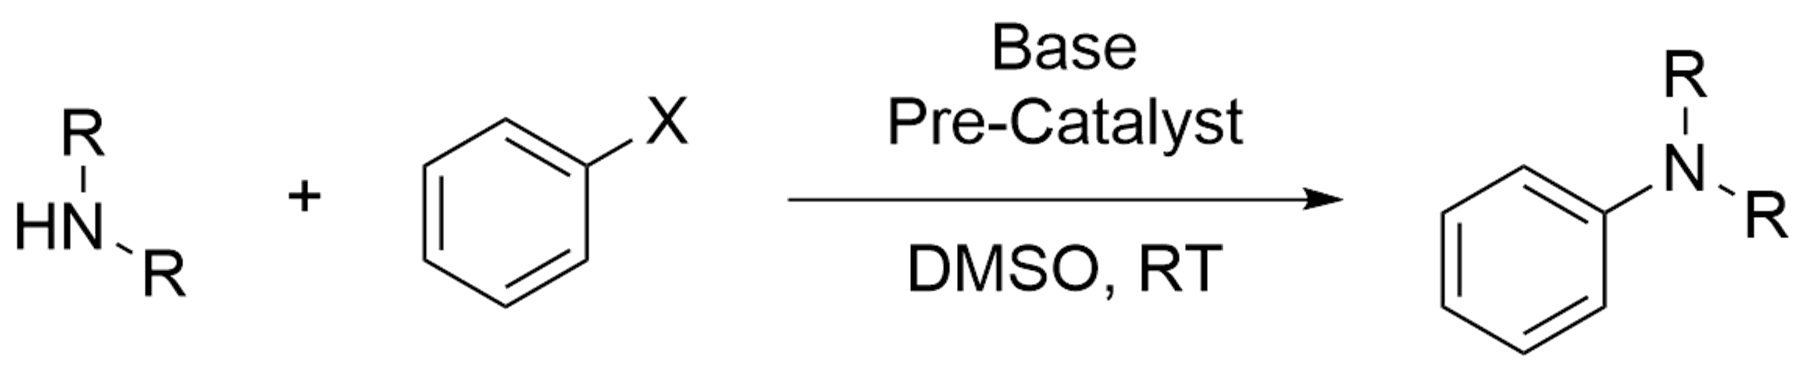

The reaction is performed at room temperature and with DMSO as a solvent. The pre-catalyst and base is varied.

#### Input and Outputs
The search space of the reaction condition includes 16 pre-catalysts and 6 bases. These are the same pre-catalysts and bases you have seen in Section B. 

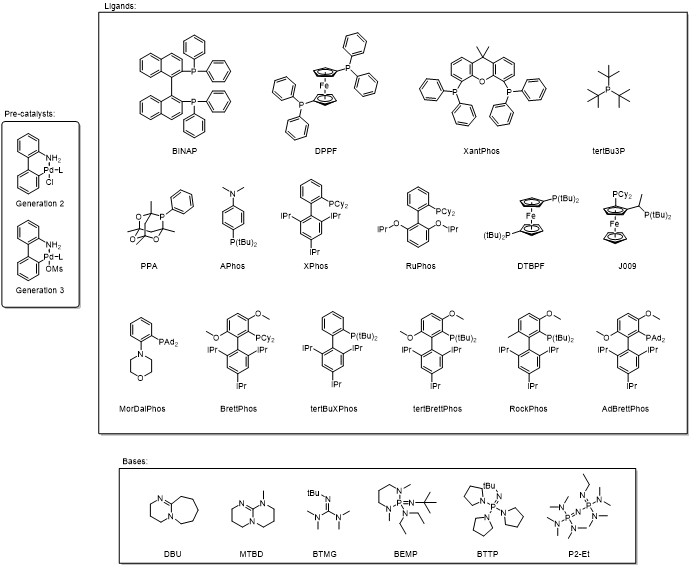

The output is the yield of the reaction measured after a given time. Your goal is to obtain the set of reaction condition that corresponds to the highest yield. Notice that you are given a budget that is small - this is to emulate real experimentation (how many experiment can you do in parallel?). Details of the optimisation are given:

```
Optimisation Task : Minimisation.
Constrains        : Budget of a maximum of 20 additional experiments (= iterations x batches) and a maximum of 4 batches per iteration. The BO optimisation will stop after a maximum runtime. 
Training points   : Allowed a maximum of 4 initial training points.
```

#### Running the Simulated Experiments
The substrates of the reaction is not revealed. Your code will be tested against 3 unseen reactions (objective function). To develop your code, you can use the list of yields obtained in Section B. The yields are negative here as we are performing minimisation. 

```python
reaction_yield = [-3.6, -3.9, -3.5, -3.3, -3.6, -3.0, -1.1, -0.7, -0.8, -0.6, -0.8, -1.2, -0.7, -1.5, -0.0, -0.0, -0.0, -0.5, -5.0, -0.0, -0.0, -1.6, -3.5, -6.6, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.5, -1.5, -0.0, -0.0, -0.0, -0.7, -0.0, -1.6, -0.0, -1.3, -2.2, -23.2, -0.0, -0.0, -0.0, -1.9, -4.0, -16.3, -4.0, -1.0, -0.0, -0.0, -0.0, -62.7, -0.4, -1.8, -1.7, -1.0, -0.0, -0.0, -0.1, -0.3, -0.3, -0.4, -0.4, -2.8, -1.1, -1.4, -2.6, -0.7, -1.4, -2.1, -10.9, -91.7, -100.0, -50.2, -27.8, -79.1, -0.0, -3.1, -0.0, -1.2, -1.8, -14.5, -0.5, -0.5, -0.0, -0.4, -0.6, -7.8, -3.1, -3.5, -3.2, -2.2, -3.0, -15.8]

def experiment_yield(condition , X_searchspace):
    return(reaction_yield[X_searchspace.index(condition)])
```

With this, the objective function is based on the index of your `X_searchspace` and reaction yield list being consistent. Your search space must be built according to the following order.

```python
precatalyst_descriptors = [['G3_BINAP',[...]],
                           ['G3_DPPF',[...]],
                           ['G2_XantPhos',[...]],
                           ['G2_tertBu3P',[...]],
                           ['G3_PPA',[...]],
                           ['G3_Aphos',[...]],
                           ['G3_Xphos',[...]],
                           ['G2_RuPhos',[...]],
                           ['G3_DTBPF',[...]],
                           ['G3_J009',[...]],
                           ['G3_MorDalPhos',[...]],
                           ['G3_BrettPhos',[...]],
                           ['G3_tertBuXPhos',[...]],
                           ['G3_tertBuBrettPhos',[...]],
                           ['G3_RockPhos',[...]],
                           ['G3_AdBrettPhos',[...]]]

base_descriptors = [['DBU', [...]],
                    ['MTBD', [...]],
                    ['BTMG', [...]],
                    ['BEMP', [...]],
                    ['BTTP', [...]],
                    ['P2Et', [...]]]

X_searchspace = []
for precat in precatalyst_descriptors:
    for base in base_descriptors:
        X_searchspace += [precat[1]+base[1]]
```

#### Goals and Submission
Using your knowledge of how Gaussian Processes and Bayesian Optimisation operate (mean function, convariance/kernal functions, initialisation points, acquisition functions, batch vs sequential etc.), your task is to develop two python classes: a GP class, a batch_BO class and chemical descriptors to obtain reaction conditions that corresponds to the highest yield under a tight budget.

You are allowed to write your own BO class or make modifications to any of the previously seen BO classes. However, you must include the attributes `self.X` and `self.Y` corresponding to all of your evaluated inputs and outputs in your BO class as this will be used to retrive the information used for scoring. 

You must also include the input `objective_func` to your BO class and pass `experiment_yield` as the input when executing! To emulate real experiments, a `experimental_time` input is also included to add additional delays to the code (the isntructor will modified if needed, for example, when there is a large number of teams achieving the highest yield). You must include `experiment_time` in your BO class and pass `exp_time` as the input when executing.

Please remove/comment your own test objective functions/experimental time delays when submitting!

```python
#submission should look something like the following
class GP: #if you have any separate classes other than the BO class
    def __init__(self, ...):
        ...
#BO class
class BO: 
    def __init__(self, ...):
        self.X = #training data which the evaluated data is to be appended
        self.Y = #evaluated via the objective function using self.X

# BO Execution Block
X_training = [...]
X_seachspace = [...]

#Please remove/comment your objective functions and exp_time when submitting!
#def obj_func(X):
#	return (...)

BO_m = BO(..., 
          objective_func = experiment_yield, #must include this exactly!
          ...,
          experiment_time = exp_time, #must include this exactly!
          ...)
```

A template and example of a GP and BO class function can be seen below. Once completed, please upload your classes in a .py file to the instructor where your code will be tested. Again, the exact substrates for the reaction is not revealed but is based on a real Buchwald-Hartwig reaction dataset.

The scoring is based on the highest total yield obtained! 

#### Guidance (Advanced): 
It is encouraged that you write your own GP/batch BO algorithm! You have a range of possibilities from implimenting more suitable kernels to using designer acquisition functions (given some knowledge of the underlying objective function - use your chemical intuition/knoweldge/literature to predict which combination works best and put these in your initial training data!). 

Your score will be further penalised by the total runtime. (ie. your final score will be `min(self.Y) + runtime`). Because the total number of experiments are limited, a large factor to the performance of BO algorithm is the quality of the chemical descriptors. A recommendation is to spend some time searching for good descriptors for the reagents and perform some decomposition (such as PCA) to limit the number of dimensions. rdkit is also among the available packages if you wish to do some molecular fingerprinting.

#### Guidance (Intermediate): 
You are more than welcomed to write your own GP/BO algorithm! You can also use the template given below. You should have some familiarity with how the basic GP and BO class in the given template work from sections A and B.

##### Some Starting Points to Help
1. The reaction is given! You can look up which combination of reaction conditions work well from your own chemical intuition/literature data. You can use these are your initial training data.
2. Similar to Section B, modify the code to include plots of how your BO functions are performing over each iteration. This will help you visualise and evaluate the usefulness of your modifications.
3. A large factor to the performance of BO algorithm is the quality of the chemical descriptors. Could you find better/more meaningful descriptors to the reagents for the given transformations? Keep in mind that each additional descriptor is an additional dimension.
4. Decide the initial training points (Random? Bias? Uniform distrubution?) and acquisition function (Greedy? Purely explorative? Lower confidence bounnd?) with the associated hyperparameters.

Other points to consider: Better kernel function? How to include more descriptor information but keep the dimensions low?

#### Package Imports

In [ ]:
# if using google collab, run the following pip installs!
!pip install sobol_seq
!pip install plotly
!pip install gpytorch
!pip install rdkit

In [5]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
import plotly.graph_objs as go
from scipy.integrate import quad
from scipy.spatial.distance import cdist
from scipy.optimize import minimize, differential_evolution, NonlinearConstraint
from sklearn.decomposition import PCA
import math
import time
import sobol_seq
import torch
import gpytorch
import copy
import rdkit

#### GP class, BO class, BO Execution Template/Example

``` python
class GP_model_meanzero:

    def __init__(self, X, Y, kernel, hyperparams_multistart_loops):
        self.X, self.Y, self.kernel = X, Y, kernel
        self.number_of_point, self.nx_dimensions, self.ny_dimensions = X.shape[0], X.shape[1], Y.shape[1]
        self.multistart_loops            = hyperparams_multistart_loops

        self.X_mean, self.X_std     = np.mean(X, axis=0), np.std(X, axis=0)
        self.Y_mean, self.Y_std     = np.mean(Y, axis=0), np.std(Y, axis=0)
        self.X_norm, self.Y_norm    = (X-self.X_mean)/self.X_std, (Y-self.Y_mean)/self.Y_std

        self.hyperparam_optimized , self.inverse_covariance_matrix_opt   = self.determine_hyperparameters()     
        
    def Cov_mat(self, kernel, X_norm, W, sf2):
        if kernel == 'SquaredExponential':
            xixj_euclidean_distance = cdist(X_norm, X_norm, 'seuclidean', V=W)**2 
            cov_matrix = sf2*np.exp(-0.5*xixj_euclidean_distance)
            return (cov_matrix)
        else:
            print('ERROR no kernel with name ', kernel)


    def negative_loglikelihood(self, hyper, X, Y):
        n_point, nx_dim = self.number_of_point, self.nx_dimensions
        kernel          = self.kernel
         
        W               = np.exp(2*hyper[:nx_dim])   # W <=> 1/lambda
        sf2             = np.exp(2*hyper[nx_dim])    # variance of the signal 
        sn2             = np.exp(2*hyper[nx_dim+1])  # variance of noise

        K       = self.Cov_mat(kernel, X, W, sf2)  
        K       = K + (sn2 + 1e-8)*np.eye(n_point) 
        K       = (K + K.T)*0.5                   
        L       = np.linalg.cholesky(K)            
        logdetK = 2 * np.sum(np.log(np.diag(L)))   
        invLY   = np.linalg.solve(L,Y)             
        alpha   = np.linalg.solve(L.T,invLY)       
        NLL     = np.dot(Y.T,alpha) + logdetK     
        return (NLL)

    
    def determine_hyperparameters(self): 
        lower_bound = np.array([-4.]*(self.nx_dimensions+1) + [-8.])  # lengthscales + signal variance, noise variance
        upper_bound = np.array([4.]*(self.nx_dimensions+1) + [ -2.]) 
        bounds      = np.hstack((lower_bound.reshape(self.nx_dimensions+2,1), upper_bound.reshape(self.nx_dimensions+2,1)))

        multi_startvec         = sobol_seq.i4_sobol_generate(self.nx_dimensions + 2, self.multistart_loops)
        
        temp_min_hyperparams   = [0.]*self.multistart_loops
        temp_loglikelihood     = np.zeros((self.multistart_loops))
        hyperparam_optimized   = np.zeros((self.nx_dimensions+2, self.ny_dimensions)) #for best solutions
        inverse_covariance_matrix_opt = []
        

        for i in range(self.ny_dimensions):
            for j in range(self.multistart_loops ):

                hyperparams_initialisation   = lower_bound + (upper_bound-lower_bound)*multi_startvec[j,:] # mapping sobol unit cube to boudns
               
                result = minimize(self.negative_loglikelihood,
                               hyperparams_initialisation,
                               args=(self.X_norm, self.Y_norm[:,i]),
                               method='SLSQP',
                               options={'disp':False,'maxiter':10000},
                               bounds=bounds,
                               tol=1e-12)
                
                temp_min_hyperparams[j] = result.x
                temp_loglikelihood[j]   = result.fun  


            minimumloglikelihood_index    = np.argmin(temp_loglikelihood)
            hyperparam_optimized[:,i]     = temp_min_hyperparams[minimumloglikelihood_index  ]
    

            lengthscale_opt         = np.exp(2.*hyperparam_optimized[:self.nx_dimensions,i])
            signalvarience_opt      = np.exp(2.*hyperparam_optimized[self.nx_dimensions,i])
            noise_opt               = np.exp(2.*hyperparam_optimized[self.nx_dimensions+1,i]) + 1e-8
    
            covarience_matrix_opt              = self.Cov_mat(self.kernel, self.X_norm, lengthscale_opt,signalvarience_opt) + noise_opt*np.eye(self.number_of_point)
            self.covarience_matrix_opt         = covarience_matrix_opt
            inverse_covariance_matrix_opt     += [np.linalg.solve(covarience_matrix_opt, np.eye(self.number_of_point))]
            
        return (hyperparam_optimized , inverse_covariance_matrix_opt)

    def calc_cov_sample(self,xnorm,Xnorm,ell,sf2):
        nx_dim = self.nx_dimensions
        dist = cdist(Xnorm, xnorm.reshape(1,nx_dim), 'seuclidean', V=ell)**2
        cov_matrix = sf2 * np.exp(-.5*dist)
        return (cov_matrix )         


    def GP_inference_np(self, x):
        nx_dim                   = self.nx_dimensions
        kernel, ny_dim           = self.kernel, self.ny_dimensions
        hypopt, Cov_mat          = self.hyperparam_optimized, self.Cov_mat
        stdX, stdY, meanX, meanY = self.X_std, self.Y_std, self.X_mean, self.Y_mean
        calc_cov_sample          = self.calc_cov_sample
        invKsample               = self.inverse_covariance_matrix_opt
        Xsample, Ysample         = self.X_norm, self.Y_norm

        xnorm = (x - meanX)/stdX
        mean  = np.zeros(ny_dim)
        var   = np.zeros(ny_dim)
        
        # ny_dim -> number of outputs
        for i in range(ny_dim):
            invK           = invKsample[i]
            hyper          = hypopt[:,i]
            ellopt, sf2opt = np.exp(2*hyper[:nx_dim]), np.exp(2*hyper[nx_dim])
            k       = calc_cov_sample(xnorm,Xsample,ellopt,sf2opt)
            mean[i] = np.matmul(np.matmul(k.T,invK),Ysample[:,i])
            var[i]  = max(0, sf2opt - np.matmul(np.matmul(k.T,invK),k)) 

        mean_sample = mean*stdY + meanY
        var_sample  = var*stdY**2
        
        return (mean_sample, var_sample)



class BO: 
    def __init__(self, X, kernel, X_searchspace, iterations,acquisition_function, objective_func,print_graph, acquisition_hyperparam, batch, experiment_time = 0):

        self.X = np.array(X)
        Fx_training = np.array([objective_func(x.tolist(),X_searchspace) for x in self.X])
        self.Y = Fx_training.reshape(-1, 1)
        

        for i in range(iterations):
            GP_m = GP_model_meanzero(self.X, self.Y, kernel, hyperparams_multistart_loops=3)

            means = np.zeros(len(X_searchspace))
            varience  = np.zeros(len(X_searchspace))
            for idx, xx in enumerate(X_searchspace):
                m, v = GP_m.GP_inference_np(xx)
                means[idx] = m.item()
                varience[idx]  = v.item()

            
            if acquisition_function == '':
                # add acquisition function
            else: 
                print('No acquisition function named', acquisition_function)

            time.sleep(experiment_time)
            new_Y = np.array([objective_func(x.tolist(),X_searchspace) for x in new_X]).reshape(-1, 1)
            self.X = np.vstack([self.X, new_X])
            self.Y = np.vstack([self.Y, new_Y])

            if print_graph:
                print(f"Iteration {i} complete.")


#execution block
X_training = [...]

X_searchspace = []
for precat in precatalyst_descriptors:
    for base in base_descriptors:
        X_searchspace += [precat[1]+base[1]]

BO_m = BO(X = ,  
         kernel =  , 
         X_searchspace =  , 
         iterations =  , 
         acquisition_function =  , 
         objective_func = experiment_yield, #must include this exactly!
         print_graph =  , 
         acquisition_hyperparam = , 
         batch = , 
         experiment_time = exp_time) #must include this exactly!
```